In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle
import shap
from sklearn.metrics import mean_absolute_error, mean_squared_error
pd.options.display.max_columns = 999

In [78]:
root = os.path.abspath(os.path.join(os.curdir, '../..'))

In [79]:
model_path = "{}/artefacts/model/model.pkl".format(root)
reg = pickle.load(open(model_path, 'rb'))

Trying to unpickle estimator SimpleImputer from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator Pipeline from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator OneHotEncoder from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator ColumnTransformer from version 0.23.1 when using version 0.23.2. This might lead to breaking code or invalid results. Use at your own risk.


In [84]:
df_val = pd.read_csv("{}/data/input/df_val.csv".format(root))
X_val = df_val.drop([target], axis=1)
y_val = df_val[target]

In [88]:
y_pred = reg.predict(X_val)
df_val["y_pred"] = y_pred
print("MSE: {}".format(mean_squared_error(y_val, y_pred, squared=False)))
print("MAE: {}".format(mean_absolute_error(y_val, y_pred)))

MSE: 1.7490696282786735
MAE: 1.3328082630935225


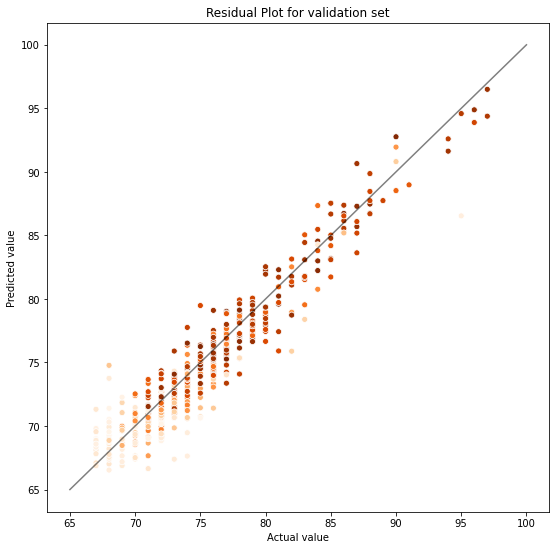

In [89]:
plt.figure(figsize=(9,9))

ax = sns.scatterplot(
    data = df_val, 
    x = "Rating", 
    y = "y_pred", 
    hue = "G", 
    palette = "Oranges",
    legend = False
)

ax.set(xlabel='Actual value', ylabel='Predicted value', title='Residual Plot for validation set')
plt.plot([65, 100], [65, 100], 'k', alpha=0.5)

plt.show()

In [ ]:
### Top 10 highest errors

In [92]:
df_val["abs_error"] = np.abs(df_val["Rating"]-df_val["y_pred"])
df_val.sort_values(by="abs_error", ascending=False).head(10)

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,Rating,SG,PG,C,SF,%GS,%MPPG,FGPM,3PPM,2PPM,FTPM,ORBPM,DRBPM,ASTPM,STLPM,BLKPM,TOVPM,PTSPM,y_pred,size,abs_error
116,121,Stephen Curry,PG,31,GSW,5,5,139,33,82,0.402,12,49,0.245,21,33,0.636,0.476,26,26,1.000,4,22,26,33,5,2,16,0,104,21.7,0.557,0.598,0.317,3.0,17.8,10.1,42.3,1.7,1.3,14.6,33.6,0.2,0.1,0.3,0.103,4.5,-0.6,3.9,0.2,2021,95,0,1,0,0,1.000000,27.800000,0.237410,0.086331,0.151079,0.187050,0.028777,0.158273,0.237410,0.035971,0.014388,0.115108,0.748201,86.537186,8.462814,8.462814
143,148,Drew Eubanks,C,22,SAS,22,3,272,43,67,0.642,1,1,1.000,42,66,0.636,0.649,20,26,0.769,28,57,85,15,5,17,21,0,107,17.3,0.682,0.015,0.388,11.1,22.6,16.8,7.7,0.9,5.5,21.1,15.8,0.5,0.3,0.8,0.134,-1.4,-0.3,-1.7,0.0,2021,68,0,0,1,0,0.136364,12.363636,0.158088,0.003676,0.154412,0.073529,0.102941,0.209559,0.055147,0.018382,0.062500,0.077206,0.393382,74.774536,6.774536,6.774536
381,391,Chandler Parsons,PF,31,ATL,5,0,54,5,18,0.278,4,14,0.286,1,4,0.250,0.389,0,0,0.000,1,6,7,3,4,1,3,1,14,5.6,0.389,0.778,0.000,2.0,12.1,7.0,7.5,3.5,1.6,14.3,16.1,-0.1,0.0,-0.1,-0.065,-4.7,-1.4,-6.1,-0.1,2021,74,0,0,0,0,0.000000,10.800000,0.092593,0.074074,0.018519,0.000000,0.018519,0.111111,0.055556,0.074074,0.018519,0.055556,0.259259,67.636719,6.363281,6.363281
373,383,Victor Oladipo,SG,27,IND,19,16,528,97,246,0.394,33,104,0.317,64,142,0.451,0.461,48,59,0.814,9,66,75,56,17,4,47,0,275,11.3,0.506,0.423,0.240,1.9,13.6,7.8,15.4,1.6,0.7,14.7,26.5,-0.6,0.6,0.0,0.002,-2.2,-1.1,-3.3,-0.2,2021,82,1,0,0,0,0.842105,27.789474,0.183712,0.062500,0.121212,0.090909,0.017045,0.125000,0.106061,0.032197,0.007576,0.089015,0.520833,75.888847,6.111153,6.111153
346,356,Mychal Mulder,SF,25,GSW,7,3,204,26,67,0.388,16,52,0.308,10,15,0.667,0.507,9,12,0.750,3,20,23,8,2,1,5,0,77,7.8,0.533,0.776,0.179,1.5,11.0,6.1,5.8,0.5,0.4,6.5,16.2,0.0,0.0,0.1,0.017,-3.3,-2.8,-6.1,-0.2,2021,68,0,0,0,1,0.428571,29.142857,0.127451,0.078431,0.049020,0.044118,0.014706,0.098039,0.039216,0.009804,0.004902,0.024510,0.377451,73.752937,5.752937,5.752937
48,51,Jonah Bolden,C,24,TOT,7,0,47,4,11,0.364,0,4,0.000,4,7,0.571,0.364,2,4,0.500,3,6,9,0,3,2,2,0,10,4.9,0.392,0.364,0.364,7.0,14.3,10.6,0.0,3.0,3.7,13.6,13.4,-0.1,0.1,0.0,-0.006,-8.7,-0.1,-8.8,-0.1,2021,73,0,0,1,0,0.000000,6.714286,0.085106,0.000000,0.085106,0.042553,0.063830,0.127660,0.000000,0.063830,0.042553,0.042553,0.212766,67.390099,5.609901,5.609901
398,408,Michael Porter,SF,21,DEN,55,8,903,195,383,0.509,62,147,0.422,133,236,0.564,0.590,60,72,0.833,66,193,259,46,27,25,49,0,512,19.8,0.617,0.384,0.188,8.2,23.9,16.1,7.9,1.5,2.6,10.6,22.3,1.8,1.1,2.9,0.154,2.4,-0.8,1.5,0.8,2021,81,0,0,0,1,0.145455,16.418182,0.215947,0.068660,0.147287,0.066445,0.073090,0.213732,0.050941,0.029900,0.027685,0.054264,0.566999,75.905739,5.094261,5.094261
185,190,Blake Griffin,PF,30,DET,18,18,512,88,250,0.352,27,111,0.243,61,139,0.439,0.406,76,98,0.776,17,67,84,59,7,7,40,1,279,11.9,0.476,0.444,0.392,3.7,15.0,9.3,18.0,0.7,1.1,12.0,28.4,-0.4,0.3,-0.1,-0.012,-1.7,-2.6,-4.3,-0.3,2021,83,0,0,0,0,1.000000,28.444444,0.171875,0.052734,0.119141,0.148438,0.033203,0.130859,0.115234,0.013672,0.013672,0.078125,0.544922,78.392761,4.607239,4.607239
231,237,Andre Iguodala,SF,36,MIA,21,0,418,38,88,0.432,14,47,0.298,24,41,0.585,0.511,6,15,0.400,17,61,78,51,14,21,26,0,96,10.5,0.507,0.534,0.170,4.7,15.7,10.4,16.9,1.6,5.0,21.6,12.7,0.0,0.6,0.6,0.065,-1.9,1.4,-0.5,0.2,2021,76,0,0,0,1,0.000000,19.904762,0.090909,0.033493,0.057416,0.014354,0.040670,0.145933,0.122010,0.033493,0.050239,0.062201,0.229665,71.408020,4.591980,4.591980
446,457,JR Smith,SG,34,LAL,6,0,79,7,22,0.318,1,11,0.091,6,11,0.545,0.341,2,2,1.000,0,5,5,3,1,0,4,0,17,0.0,0.372,0.500,0.091,0.0,6.9,3.5,4.8,0.6,0.0,14.9,14.3,-0.2,0.1,-0.1,-0.077,-7.8,-2.0,-9.8,-0.2,2021,74,1,0,0,0,0.000000,13.166667,0.088608,0.012658,0.075949,0.025316,0.000000,0.063291,0.

In [81]:
estimator = reg["regressor"]
X_train_preprocess = reg['preprocessor'].transform(X_train)
X_test_preprocess = reg['preprocessor'].transform(X_test)
X_val_preprocess = reg['preprocessor'].transform(X_val)

mybooster = estimator.get_booster()

model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray
mybooster.save_raw = myfun

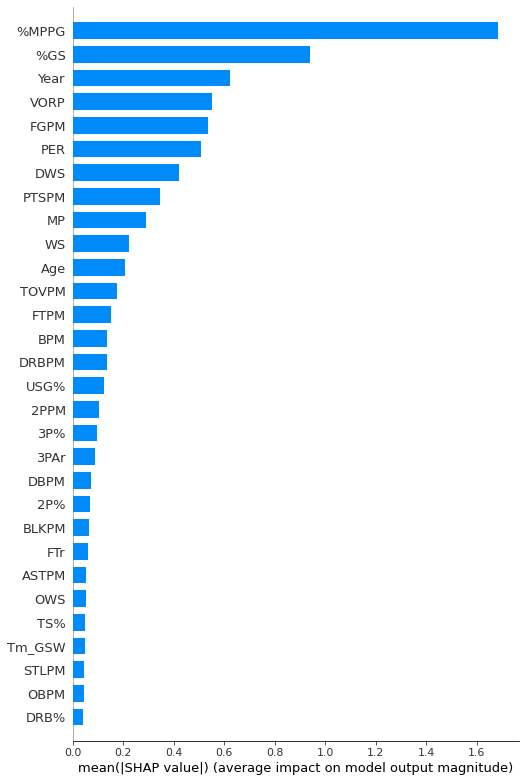

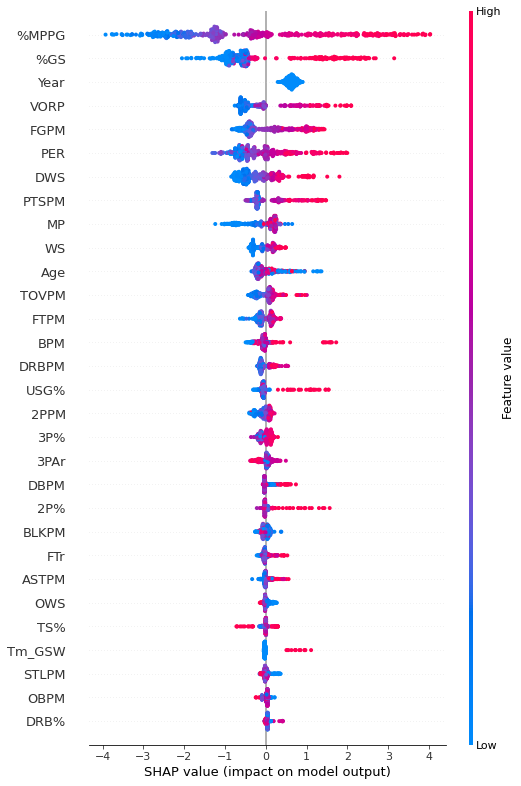

In [95]:
cols = features_numeric + list(reg['preprocessor'].transformers_[1][1]['onehot'].get_feature_names(features_cat))
explainer = shap.TreeExplainer(estimator)
shap_values = explainer.shap_values(X_val_preprocess)
shap.summary_plot(shap_values, X_val_preprocess, plot_type="bar", feature_names=cols, max_display=30)
shap.summary_plot(shap_values, X_val_preprocess, feature_names=cols, max_display=30)

In [115]:
X_val[X_val["Player"].str.contains('Montrezl Harrell')]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,Year,SG,PG,C,SF,%GS,%MPPG,FGPM,3PPM,2PPM,FTPM,ORBPM,DRBPM,ASTPM,STLPM,BLKPM,TOVPM,PTSPM
195,201,Montrezl Harrell,C,26,LAC,63,2,1749,471,812,0.58,0,18,0.0,471,794,0.593,0.58,231,351,0.658,163,282,445,107,39,72,108,0,1173,23.2,0.607,0.022,0.432,9.9,16.3,13.2,10.3,1.1,3.6,10.1,25.7,4.4,2.5,7.0,0.191,2.5,0.5,2.9,2.2,2021,0,0,1,0,0.031746,27.761905,0.269297,0.0,0.269297,0.132075,0.093196,0.161235,0.061178,0.022298,0.041166,0.06175,0.670669


In [117]:
shap.initjs()
idx = X_val[X_val["Player"].str.contains('Drew Eubanks')].index
print(df_val["Player"].iloc[idx[0]])
print("\nReal rating: ", df_val["Rating"].iloc[idx[0]])
print("Predicted rating: ", df_val["y_pred"].iloc[idx[0]])
shap.force_plot(
    explainer.expected_value, 
    shap_values[idx,:], 
    pd.DataFrame(X_val_preprocess, columns=cols).iloc[idx,:]
)

Drew Eubanks

Real rating:  68
Predicted rating:  74.774536
